# Imports

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

# Loading the data

In [2]:
income_data = pd.read_csv('adult.csv')

In [3]:
income_data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
income_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


The dataset consists of many objects with the expection of columns: age, fnlwgt, educational-num, capital gain/ loss, and hours-per-week. 

# Cleaning the data 

In [5]:
# checking for missing values
income_data.isna().head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


The dataset has no missing values. It does have some columns with values input as "?". Will change these values as "unspecified".

In [6]:
# Replacing '?' value with 'not specified' 
income_data = income_data.replace('?','unspecified')

In [7]:
income_data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,unspecified,103497,Some-college,10,Never-married,unspecified,Own-child,White,Female,0,0,30,United-States,<=50K


# Exploring the Data

In [8]:
income_data['income'].value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

The data is made of up two income brackets: >50k and <=50k. These made me question, "What makes an individual fall into either of these income brackets". 

I decided to evaluate each income bracket separately to analyze the trend of each income bracket. 

In [9]:
# Dataframe based on incomes >50k: lower_income 
lower_income = income_data[income_data["income"] == ">50K"]
lower_income.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
10,65,Private,184454,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,6418,0,40,United-States,>50K
14,48,Private,279724,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,3103,0,48,United-States,>50K


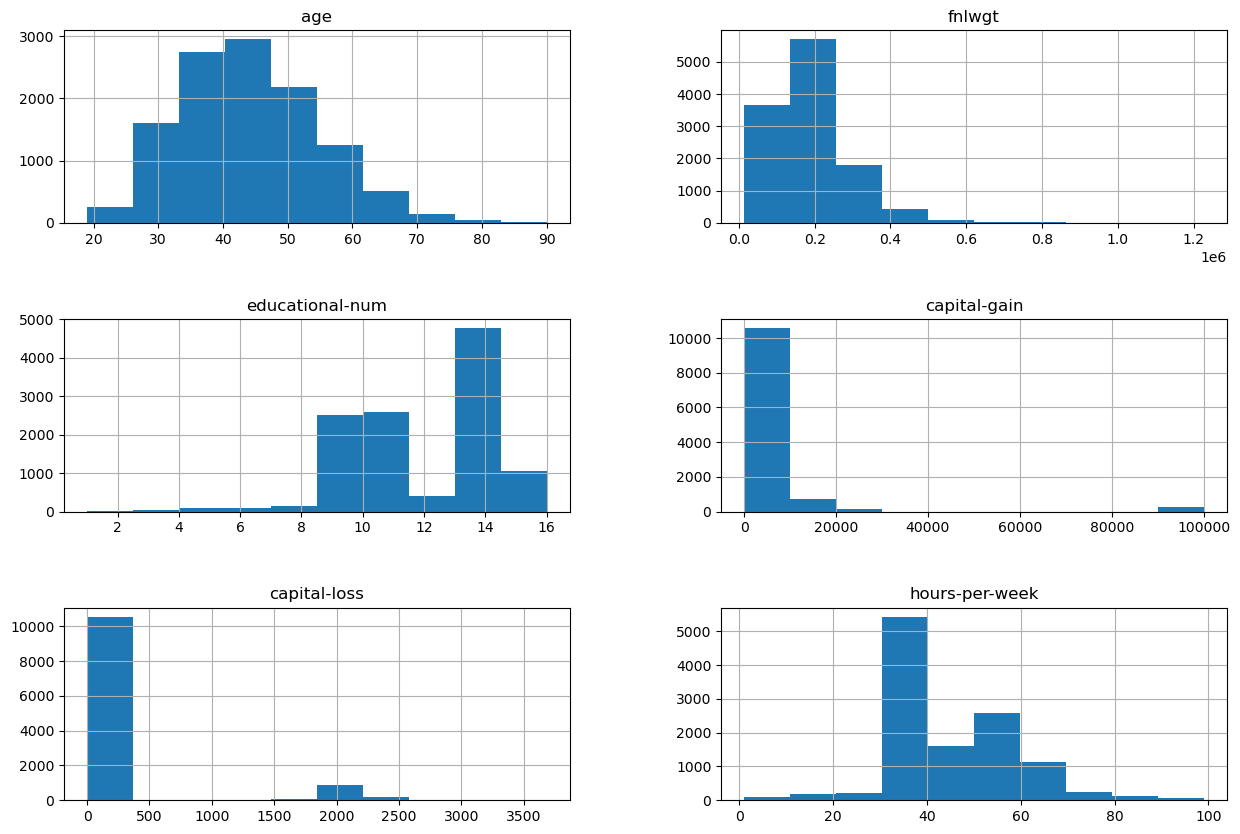

In [10]:
lower_income.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5)

In  >50k income bracket, age is showing a wide variety, with 20s and 80s being on the lower spectrum. Education is showing a left skewed distribution, with education level 14 being the highest. Another interesting pattern noted were hours per week worked. The data shows an increase in frequency between 40 hours to 60 hours. Capital gain and capital loss showed similar results, most of the frequency was on the lower spectrum. 


In [11]:
# Dataframe based on incomes <=50k: higher_income 
higher_income = income_data[income_data["income"] == "<=50K"]
higher_income.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
4,18,unspecified,103497,Some-college,10,Never-married,unspecified,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,unspecified,227026,HS-grad,9,Never-married,unspecified,Unmarried,Black,Male,0,0,40,United-States,<=50K


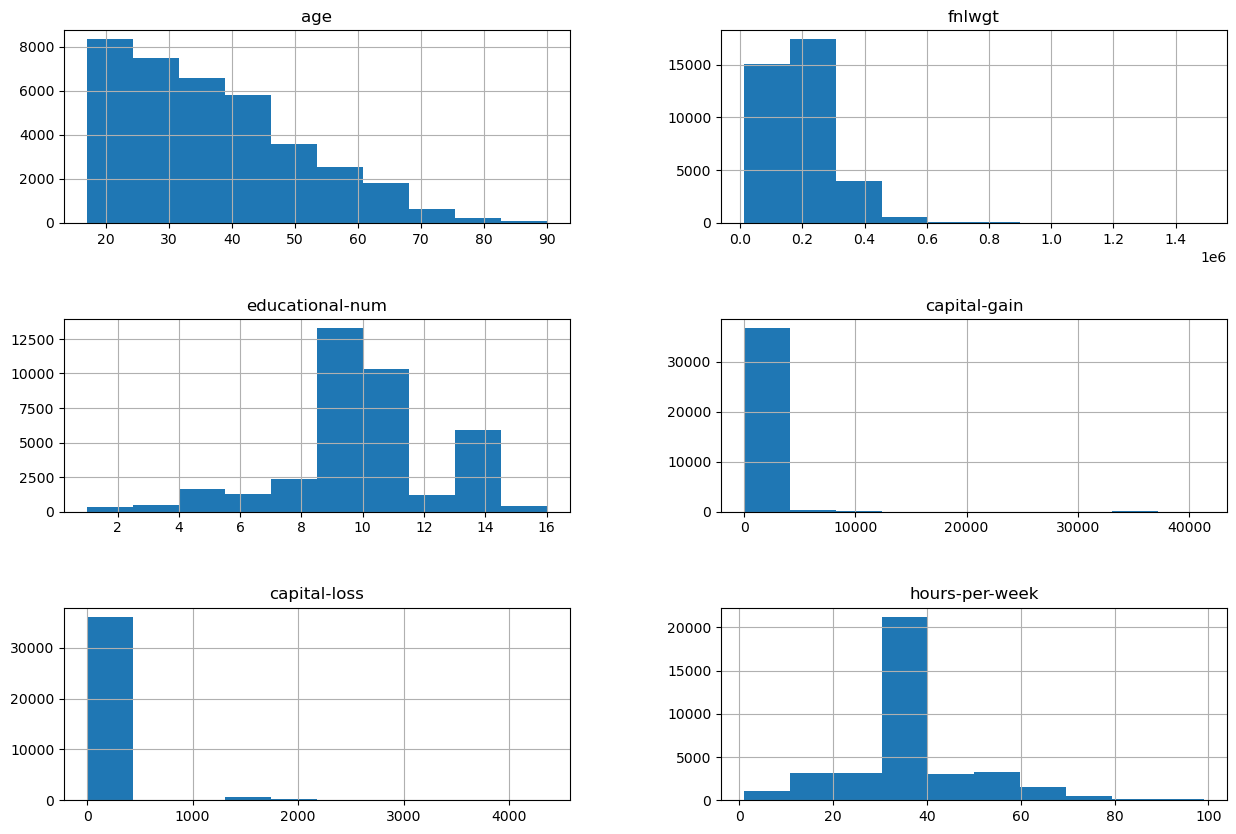

In [12]:
higher_income.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5)

Within this income bracket, age showed a right skewed distribution (with ages 70 and older on the lower spectrum). Education levels showed a wide variety with majority frequency being between 8 and 12. Similarly to the >50k income bracket, capital gain and capital loss have similar trends. Both with the majority being on the lower spectrum. 

Based on the trends found above in both income brackets, I decided to take a closer look into a few relationships: education and income, age and income, hours worked and income, and lastly work-class and income. Since capital gain and loss both yielded similar results in both brackets, did not decide to look further into the relationships. 

###### Education and Income Relationship 

In [13]:
# Education and Income 
educ_incom = pd.DataFrame(income_data[['educational-num','income']])
educ_incom

,educational-num,income
0,7,<=50K
1,9,<=50K
2,12,>50K
3,10,>50K
4,10,<=50K
...,...,...
48837,12,<=50K
48838,9,>50K
48839,9,<=50K
48840,9,<=50K


In [14]:
income_data['<=50K'] = (income_data['income']== '<=50K').astype(int)

In [15]:
# education levels of higher income bracket 
education_higher = income_data.groupby('educational-num')['<=50K'].agg('mean')
education_higher 

educational-num
1     0.987952
2     0.967611
3     0.946955
4     0.935079
5     0.945767
6     0.937365
7     0.949227
8     0.926941
9     0.841422
10    0.810351
11    0.746725
12    0.742036
13    0.587165
14    0.450884
15    0.260192
16    0.274411
Name: <=50K, dtype: float64

Text(0.5, 1.0, 'Income <=50K: Education Levels')

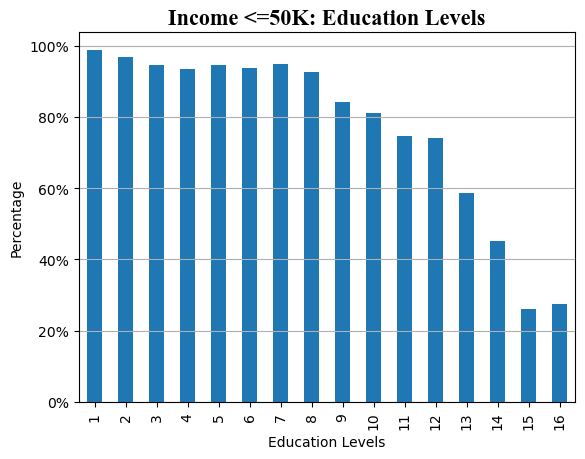

In [16]:
# Bar Graph of education levels within the <=50K income bracket 
import matplotlib.ticker as mtick

ax = education_higher.plot(kind='bar')
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.grid(axis='y')
ax.set_ylabel('Percentage')
ax.set_xlabel('Education Levels')
plt.title('Income <=50K: Education Levels',fontname="Times New Roman", fontweight="bold", fontsize=16)

Education levels 14,15, and 16 were the only levels not to reach the 50% margin. Education levels ranging from 1 to 10 all reached the 80% margin. 

In [17]:
income_data['>50K'] = (income_data['income']== '>50K').astype(int)

In [18]:
# Education levels of lower income bracket 
education_lower = income_data.groupby('educational-num')['>50K'].agg('mean')
education_lower 

educational-num
1     0.012048
2     0.032389
3     0.053045
4     0.064921
5     0.054233
6     0.062635
7     0.050773
8     0.073059
9     0.158578
10    0.189649
11    0.253275
12    0.257964
13    0.412835
14    0.549116
15    0.739808
16    0.725589
Name: >50K, dtype: float64

Text(0.5, 1.0, 'Income >50K: Education Levels')

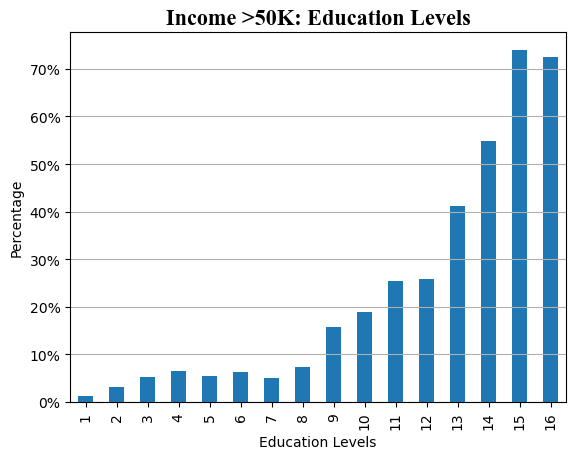

In [19]:
## Bar graph of education levels within the >50K income bracket 
ax = education_lower.plot(kind='bar')
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.grid(axis='y')
ax.set_ylabel('Percentage')
ax.set_xlabel('Education Levels')
plt.title('Income >50K: Education Levels',fontname="Times New Roman", fontweight="bold", fontsize=16)

Education levels ranging from 1 to 12 are much lower in the >50k income compared to the <=50k bracket. Education levels 15 and 16 were the higher of the group; both reaching over the 70% margin. 

###### Age and Income Relationship 

In [24]:
# Ages of the higher income 
age_higher_inc = income_data.groupby('age')['<=50K'].agg('mean')
age_higher_inc

age
17    1.000000
18    1.000000
19    0.997151
20    0.999102
21    0.994526
        ...   
86    1.000000
87    1.000000
88    0.833333
89    1.000000
90    0.763636
Name: <=50K, Length: 74, dtype: float64

Text(0.5, 1.0, 'Income <=50K: Age Distribution')

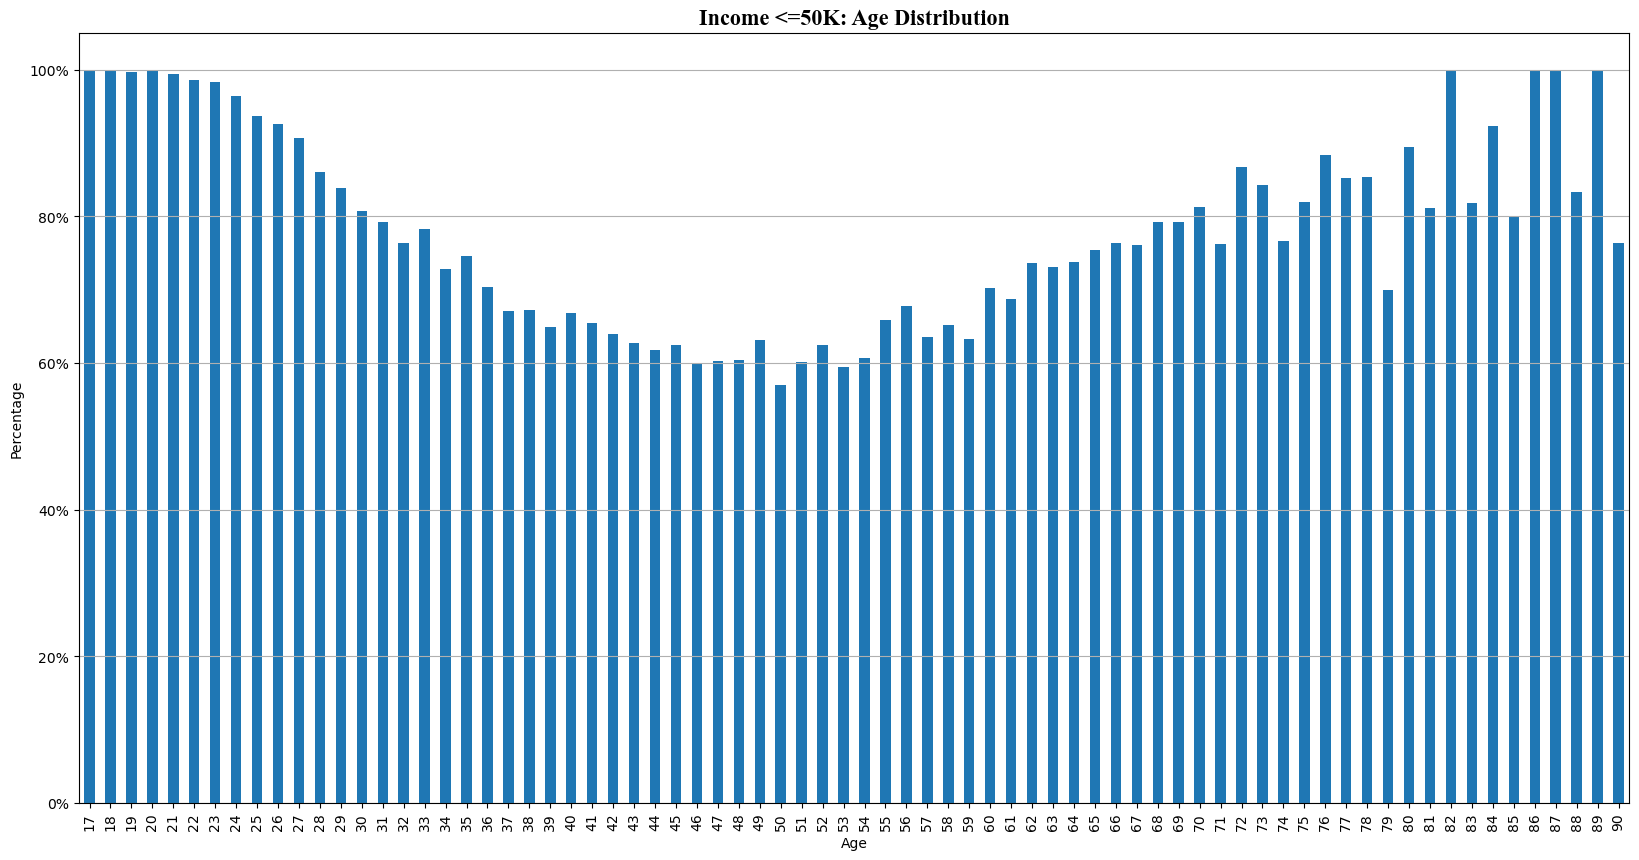

In [25]:
# Bar graph of relationship between age & income : <=50k
ax = age_higher_inc.plot(kind='bar', figsize=(20,10))
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.grid(axis='y')
ax.set_ylabel('Percentage')
ax.set_xlabel('Age')
plt.title('Income <=50K: Age Distribution',fontname="Times New Roman", fontweight="bold", fontsize=16)

No specific trend noticed on the ages of the <=50k income bracket. 

In [28]:
# Ages of the lower income 
age_lower_inc = income_data.groupby('age')['>50K'].agg('mean')
age_lower_inc

age
17    0.000000
18    0.000000
19    0.002849
20    0.000898
21    0.005474
        ...   
86    0.000000
87    0.000000
88    0.166667
89    0.000000
90    0.236364
Name: >50K, Length: 74, dtype: float64

Text(0.5, 1.0, 'Income >50K: Age Distribution')

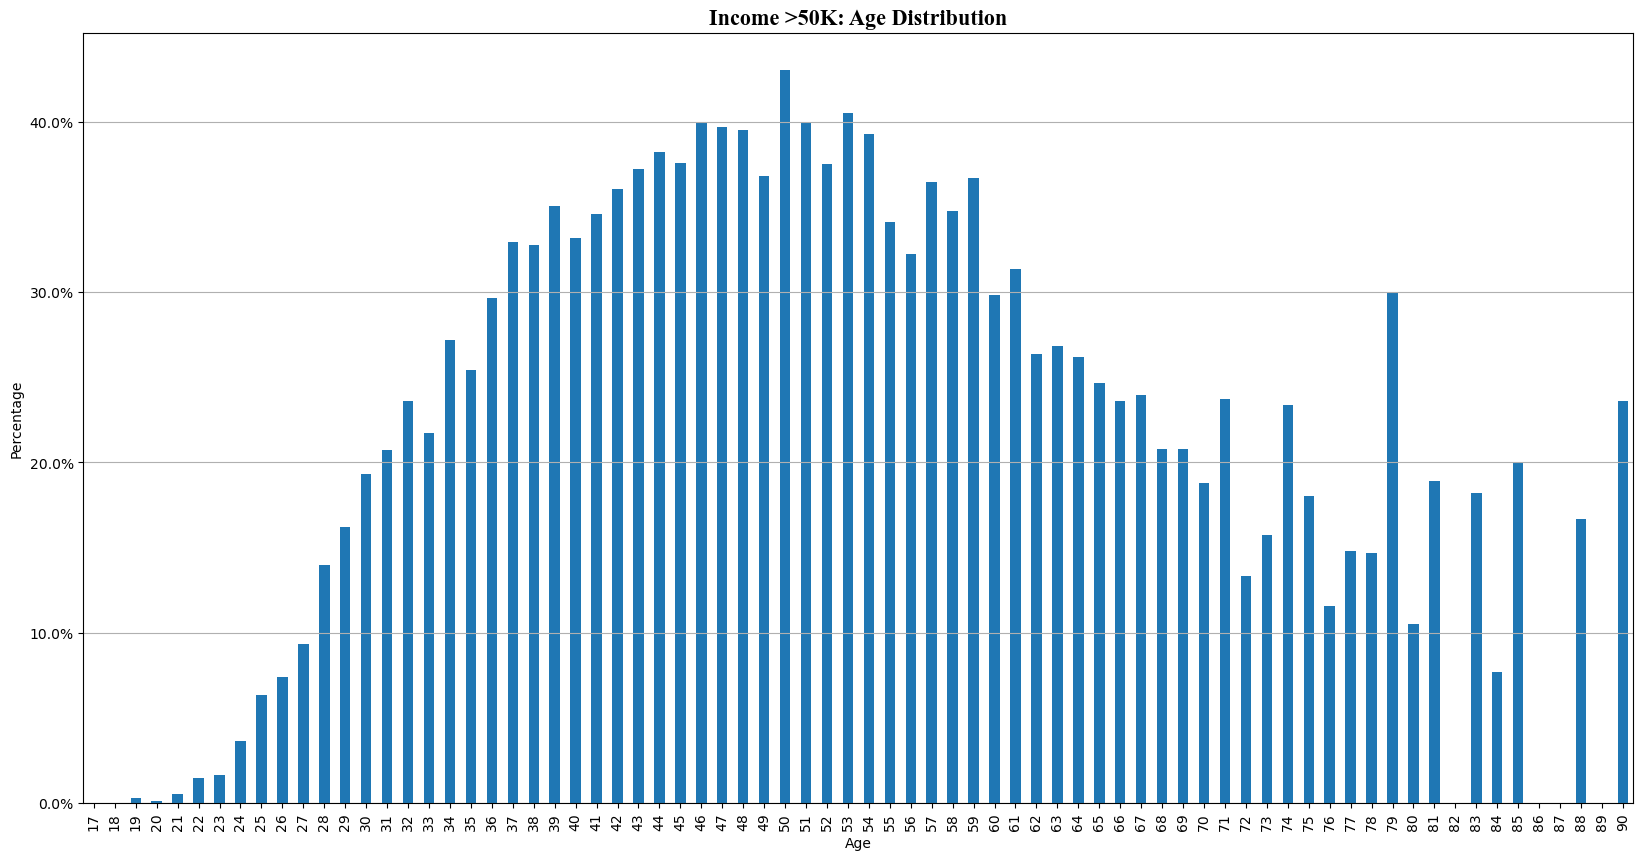

In [29]:
# Bar graph of relationship between age & income : >50k 
ax = age_lower_inc.plot(kind='bar', figsize=(20,10))
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.grid(axis='y')
ax.set_ylabel('Percentage')
ax.set_xlabel('Age')
plt.title('Income >50K: Age Distribution',fontname="Times New Roman", fontweight="bold", fontsize=16)

The >50k bracket showed a vase variety from ages 17 to 90. There were high peaks seen between the early 40s and early 50s . In addition, no age besides 50 in this bracket reached over the 40% margin, which was the total opposite of the <=50k bracket. 

###### Hours Worked and Income Relationship 

In [30]:
# Hours worked: >50k income bracket 
hw_lower = income_data.groupby('hours-per-week')['>50K'].agg('mean')

Text(0.5, 1.0, 'Income >50K: Hours-per-WeeK Worked ')

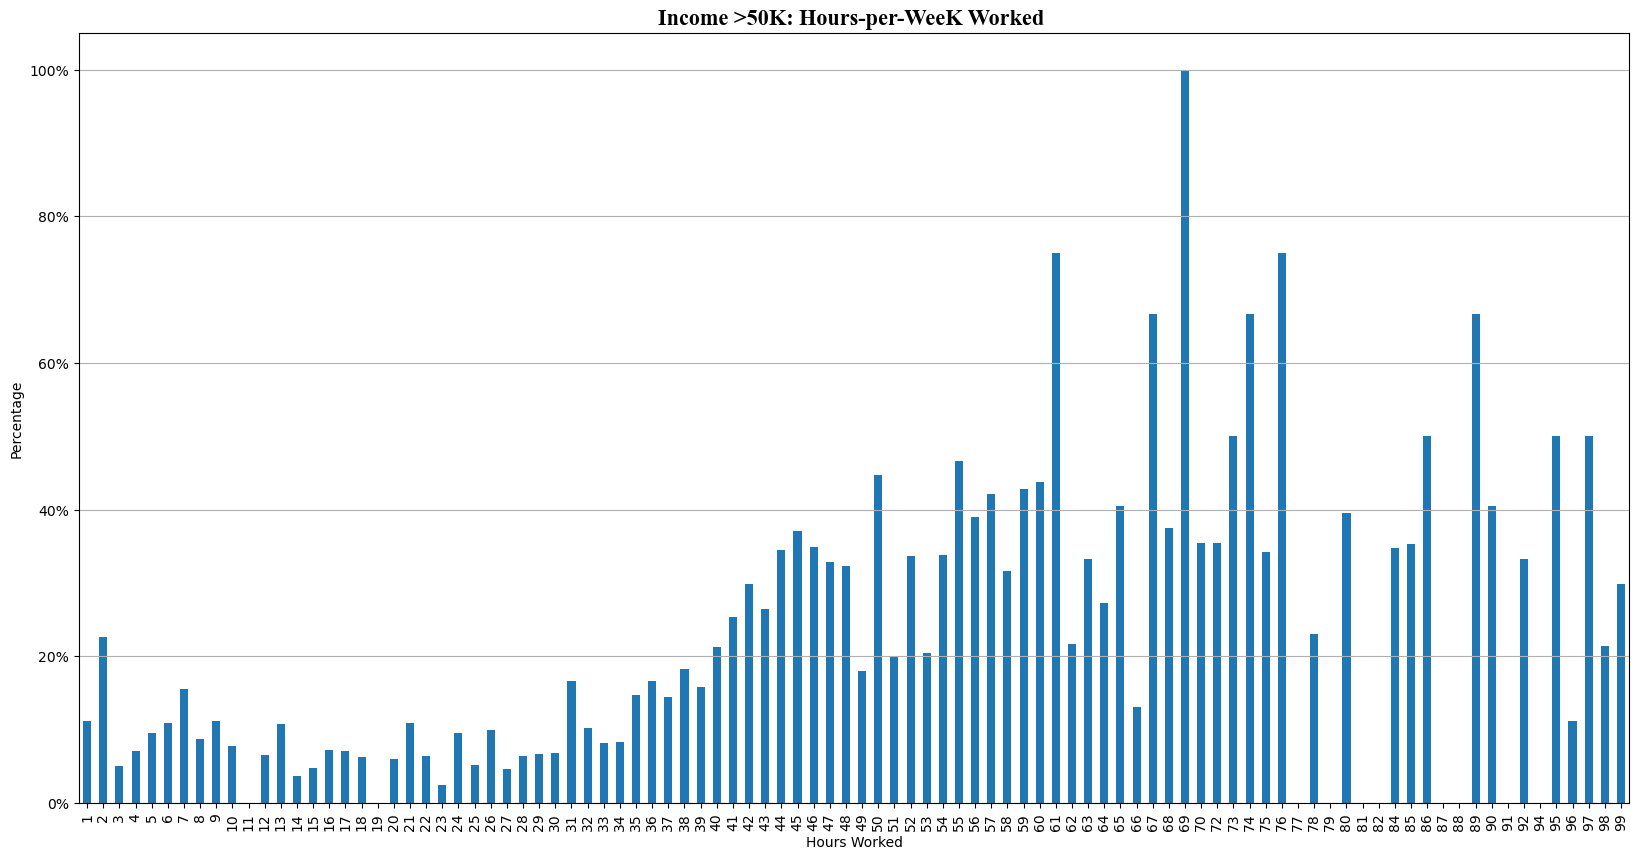

In [32]:
# Bar graph of hours worked of >50k income bracket 
ax = hw_lower.plot(kind='bar', figsize=(20,10))
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.grid(axis='y')
ax.set_ylabel('Percentage')
ax.set_xlabel('Hours Worked')
plt.title('Income >50K: Hours-per-WeeK Worked ',fontname="Times New Roman", fontweight="bold", fontsize=16)

In [33]:
# Hours worked: <=50k income bracket 
hw_higher = income_data.groupby('hours-per-week')['<=50K'].agg('mean')

Text(0.5, 1.0, 'Income <=50K: Hours Worked')

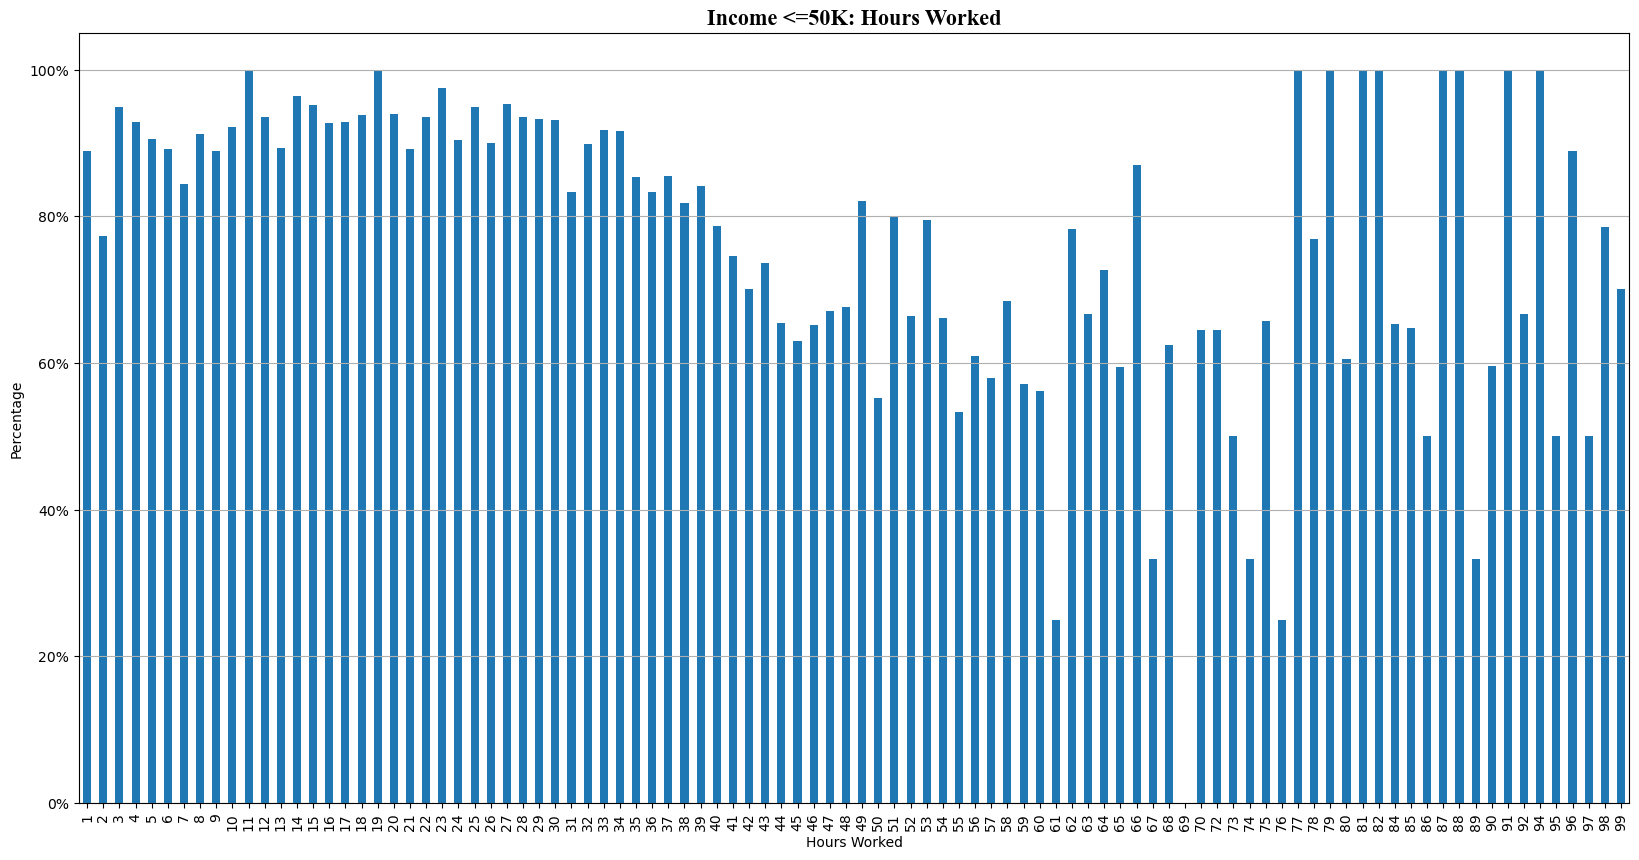

In [35]:
# Bar graph of hours worked of <=50k income bracket 
ax = hw_higher.plot(kind='bar', figsize=(20,10))
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.grid(axis='y')
ax.set_ylabel('Percentage')
ax.set_xlabel('Hours Worked')
plt.title('Income <=50K: Hours Worked',fontname="Times New Roman", fontweight="bold", fontsize=16)

In >50k bracket showed higher frequency between 45 to about 65 hours. There was noticeably lower frequency up to 40 hours. 

The <=50k bracket showed a vase variety from 1 to 99 hours. 

###### Workclass and Income Relationship 

In [36]:
# Working Class : >50k 
wc_lower = income_data.groupby('workclass')['>50K'].agg('mean')

Text(0.5, 1.0, 'Income >50K: Work Class')

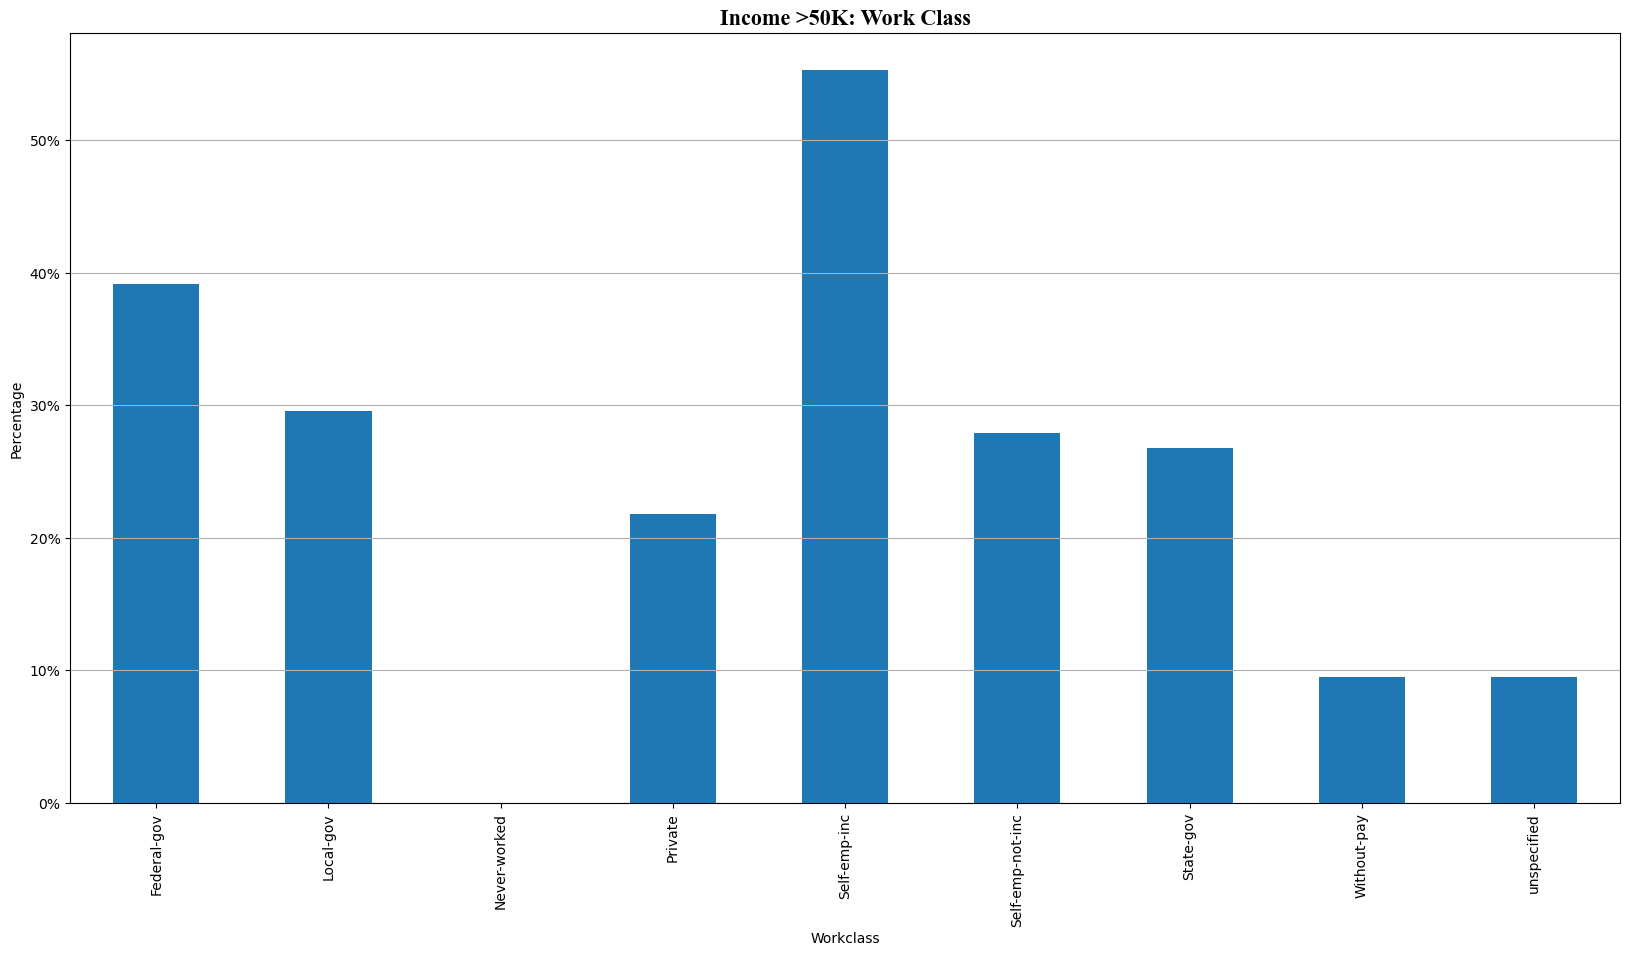

In [38]:
# Bar graph of workclass >50k
ax = wc_lower.plot(kind='bar', figsize=(20,10))
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.grid(axis='y')
ax.set_ylabel('Percentage')
ax.set_xlabel('Workclass')
plt.title('Income >50K: Work Class',fontname="Times New Roman", fontweight="bold", fontsize=16)

In [39]:
# Working Class : <=50k
wc_higher =  income_data.groupby('workclass')['<=50K'].agg('mean')

Text(0.5, 1.0, 'Income <=50K: Work Class')

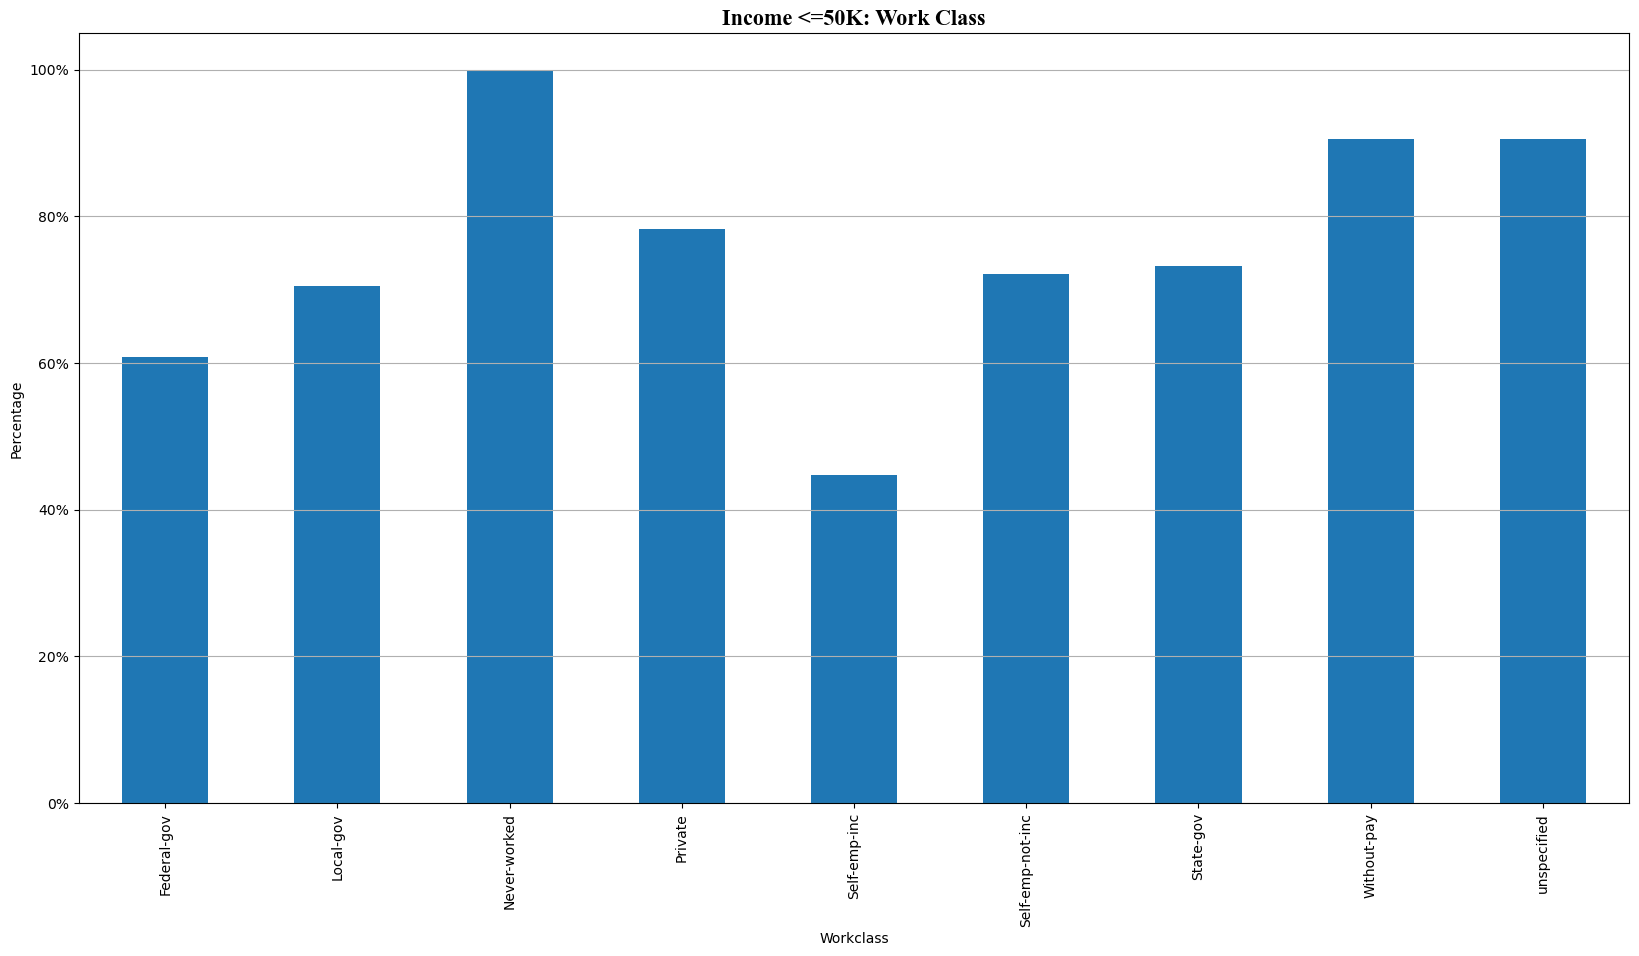

In [41]:
# Bar graph of workclass <=50k
ax = wc_higher.plot(kind='bar', figsize=(20,10))
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.grid(axis='y')
ax.set_ylabel('Percentage')
ax.set_xlabel('Workclass')
plt.title('Income <=50K: Work Class',fontname="Times New Roman", fontweight="bold", fontsize=16)

In the >50k  bracket, self-employed came in first in the working class. In the <=50k bracket, never-worked came in first. All work-classes besides self-employed reached the 60% margin. 

# Summary

From this data, a few conclusions can be made. Age does not affect income. Both income brackets show variety in age. This could be due to the industry the person is in or how much they work. Work class can dictate what an individual earns to a certian point. Surprisingly hours worked do not correlate to income as it varies depending on the individual job.